In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1] range
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the 28x28 images into vectors of size 784
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Model Without Batch Normalization

In [2]:
def build_model_without_batchnorm(input_dim=784):
    model = Sequential([
        Dense(256, activation='relu', input_dim=input_dim),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Model With Batch Normalization

In [3]:
def build_model_with_batchnorm(input_dim=784):
    model = Sequential([
        Dense(256, input_dim=input_dim),
        BatchNormalization(),  # Batch Normalization after the dense layer
        Activation('relu'),
        Dense(128),
        BatchNormalization(),
        Activation('relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Train Both Models

In [5]:
print("************************************************************** Traning start without Batch Normalization ******************************************************************")

# Train model without Batch Normalization
model_without_bn = build_model_without_batchnorm()
history_without_bn = model_without_bn.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=128,
    verbose=1
)
print("************************************************************** Traning end without Batch Normalization ******************************************************************")

print("************************************************************** Traning start with Batch Normalization ******************************************************************")
# Train model with Batch Normalization
model_with_bn = build_model_with_batchnorm()
history_with_bn = model_with_bn.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=128,
    verbose=1
)
print("************************************************************** Traning end with Batch Normalization ******************************************************************")

************************************************************** Traning start without Batch Normalization ******************************************************************


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8510 - loss: 0.5487 - val_accuracy: 0.9549 - val_loss: 0.1538
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9627 - loss: 0.1253 - val_accuracy: 0.9663 - val_loss: 0.1113
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9776 - loss: 0.0773 - val_accuracy: 0.9732 - val_loss: 0.0859
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9840 - loss: 0.0547 - val_accuracy: 0.9729 - val_loss: 0.0956
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9877 - loss: 0.0408 - val_accuracy: 0.9754 - val_loss: 0.0853
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9906 - loss: 0.0297 - val_accuracy: 0.9768 - val_loss: 0.0849
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9937 - loss: 0.0201 - val_accuracy: 0.9740 - val_loss: 0.0889
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9948 - loss: 0.0161 - val_accuracy: 

## Plot Training and Validation Metrics

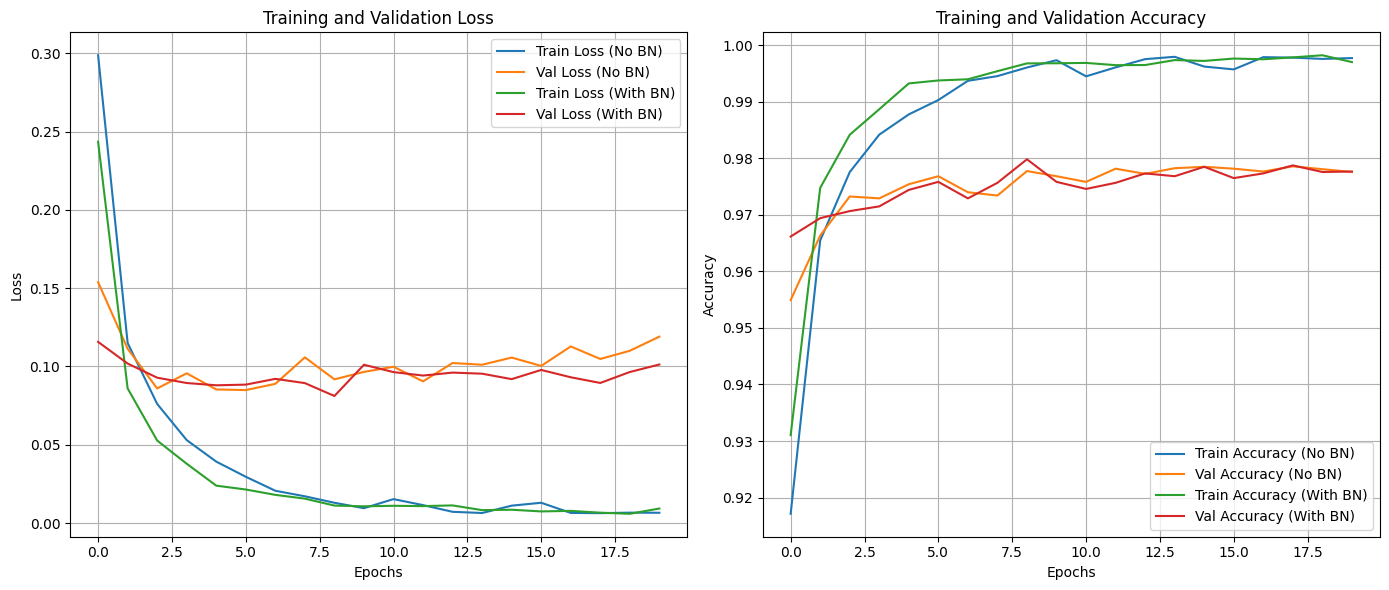

In [6]:
# Plot training and validation loss
plt.figure(figsize=(14, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history_without_bn.history['loss'], label='Train Loss (No BN)')
plt.plot(history_without_bn.history['val_loss'], label='Val Loss (No BN)')
plt.plot(history_with_bn.history['loss'], label='Train Loss (With BN)')
plt.plot(history_with_bn.history['val_loss'], label='Val Loss (With BN)')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history_without_bn.history['accuracy'], label='Train Accuracy (No BN)')
plt.plot(history_without_bn.history['val_accuracy'], label='Val Accuracy (No BN)')
plt.plot(history_with_bn.history['accuracy'], label='Train Accuracy (With BN)')
plt.plot(history_with_bn.history['val_accuracy'], label='Val Accuracy (With BN)')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()